In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Use a sample of around 25% of the data
df = pd.read_csv('producers_direct.csv', nrows=5000000)

**Data Exploration**

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   question_id                 5000000 non-null  int64 
 1   question_user_id            5000000 non-null  int64 
 2   question_language           5000000 non-null  object
 3   question_content            5000000 non-null  object
 4   question_topic              4401028 non-null  object
 5   question_sent               5000000 non-null  object
 6   response_id                 5000000 non-null  int64 
 7   response_user_id            5000000 non-null  int64 
 8   response_language           5000000 non-null  object
 9   response_content            5000000 non-null  object
 10  response_topic              1795955 non-null  object
 11  response_sent               5000000 non-null  object
 12  question_user_type          5000000 non-null  object
 13  question_use

In [6]:
df.describe()

,question_id,question_user_id,response_id,response_user_id
count,5000000.00,5000000.00,5000000.00,5000000.00
mean,10251700.24,819432.31,10641477.95,668425.99
std,3391991.19,394427.22,4429833.23,387116.23
min,3849056.00,7.00,3849209.00,7.00
25%,7465106.75,502277.00,7625062.50,339283.00
50%,10359990.00,901330.00,10562995.00,682178.00
75%,13192675.00,1144761.00,13411540.25,998963.00
max,15952542.00,1491708.00,59262348.00,1496492.00


In [7]:
df.head()

,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,response_topic,response_sent,question_user_type,question_user_status,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',NaN,2019-01-24 17:54:06.216221+00,farmer,live,ug,NaN,NaN,2017-11-18 13:09:11+00,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,NaN,2018-01-04 08:57:28+00,farmer,live,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,cattle,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00


In [8]:
responses_per_question = df.groupby('question_id')['response_id'].nunique(). reset_index()
responses_per_question.sort_values(by='response_id', ascending=False).head(20)

,question_id,response_id
698185,10326500,2039
1188979,15692264,490
461425,7966829,450
1205974,15896150,414
1205874,15895529,340
1189029,15692759,316
1126177,14985635,202
976561,13240254,188
508733,8364445,172
738701,10705133,163


In [9]:
possible_duplicates = df.groupby(['question_id', 'response_id', 'response_user_id']).size().reset_index(name='count')
possible_duplicates[possible_duplicates['count'] > 1].head()

,question_id,response_id,response_user_id,count
2,3849077,3849291,296187,4
13,3849100,3852604,412335,2
14,3849100,4238099,412335,2
15,3849100,4263505,412335,2
25,3849196,3849536,418843,4


**Data Prep**

Convert columns to required formats and fill in missing values

In [10]:
date_cols = ['question_sent', 'response_sent', 'question_user_created_at', 'response_user_created_at']

# Remove trailing microseconds from question and response times and convert columns to `datetime`
for col in date_cols:
  df[col] = df[col].str.split('.').str[0]
  df[col + '_time'] = pd.to_datetime(df[col], format='mixed', utc=True)

df['response_sent_month'] = df['response_sent_time'].dt.to_period('M')
df.head()

/tmp/ipython-input-1222448501.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['response_sent_month'] = df['response_sent_time'].dt.to_period('M')


,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,response_topic,response_sent,question_user_type,question_user_status,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at,question_sent_time,response_sent_time,question_user_created_at_time,response_user_created_at_time,response_sent_month
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',NaN,2019-01-24 17:54:06,farmer,live,ug,NaN,NaN,2017-11-18 13:09:11+00,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00,2017-11-22 12:25:03+00:00,2019-01-24 17:54:06+00:00,2017-11-18 13:09:11+00:00,2017-05-09 09:19:33+00:00,2019-01
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,NaN,2018-01-04 08:57:28+00,farmer,live,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00,2017-11-22 12:25:05+00:00,2018-01-04 08:57:28+00:00,2017-11-20 11:55:48+00:00,2017-11-22 10:13:03+00:00,2018-01
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,2017-11-22 12:25:08+00:00,2017-11-22 12:35:26+00:00,2017-08-22 14:51:07+00:00,2017-08-12 09:30:33+00:00,2017-11
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,cattle,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,2017-11-22 12:25:08+00:00,2017-11-22 12:35:26+00:00,2017-08-22 14:51:07+00:00,2017-08-12 09:30:33+00:00,2017-11
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,2017-11-22 12:25:08+00:00,2017-11-22 12:35:26+00:00,2017-08-22 14:51:07+00:00,2017-08-12 09:30:33+00:00,2017-11


In [11]:
# Fill in missing values with 'UNKNOWN'
df['question_topic'] = df['question_topic'].fillna('UNKNOWN')
df['question_topic'].value_counts()

,count
question_topic,
maize,689809
UNKNOWN,598972
cattle,436244
chicken,424162
tomato,348315
plant,313722
bean,177232
poultry,173337
crop,160949


**Identifying leaders based on activity**

Highly active users could be defined as those who
1. Provide the most responses
2. Are active on the most number of unique days

In [12]:
unique_responding_users = df['response_user_id'].unique()

In [13]:
# Users providing the most responses
top_responders = df.groupby('response_user_id')['response_id'].nunique().reset_index()
top_responders.rename(columns={'response_id': 'total_responses'}, inplace=True)
top_responders = top_responders.sort_values(by='total_responses', ascending=False).reset_index(drop=True)
top_responders.head(10)

,response_user_id,total_responses
0,478338,4791
1,810401,4084
2,1049966,4006
3,895126,3622
4,701231,3578
5,367428,3363
6,202949,3316
7,910595,3084
8,846731,3003
9,171296,2981


In [14]:
top_responders.describe()

,response_user_id,total_responses
count,225787.00,225787.00
mean,687309.65,16.93
std,396806.58,55.96
min,7.00,1.00
25%,350936.50,2.00
50%,678628.00,5.00
75%,1022461.00,14.00
max,1496492.00,4791.00


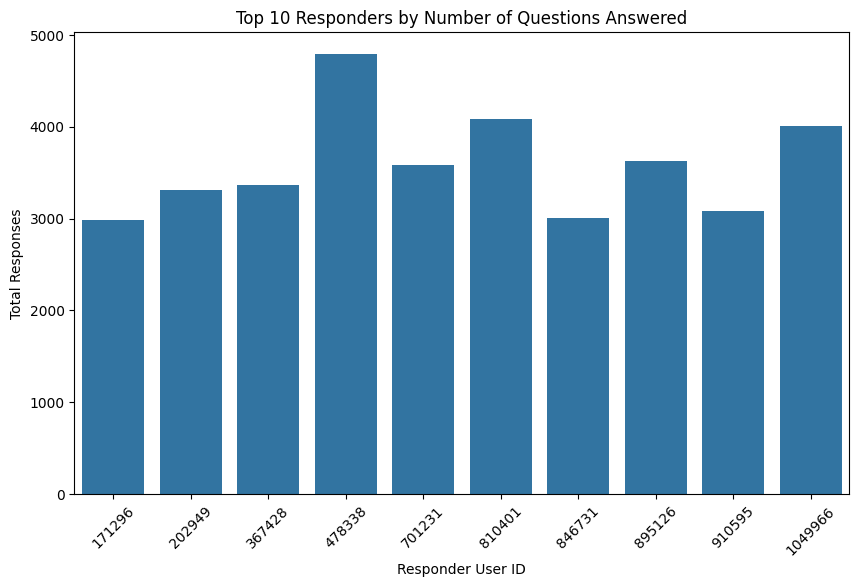

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='response_user_id', y='total_responses', data=top_responders.head(10))
plt.title('Top 10 Responders by Number of Questions Answered')
plt.xlabel('Responder User ID')
plt.ylabel('Total Responses')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Unique days when users are active
df['response_date'] = df['response_sent_time'].dt.date
top_activity = df.groupby('response_user_id')['response_date'].nunique().reset_index()
top_activity.rename(columns={'response_date': 'unique_days_active'}, inplace=True)
top_activity = top_activity.sort_values(by='unique_days_active', ascending=False).reset_index(drop=True)
top_activity.head(10)

,response_user_id,unique_days_active
0,1017359,489
1,350475,336
2,633124,311
3,367428,296
4,454233,295
5,810401,291
6,472960,271
7,171296,259
8,518094,245
9,252683,242


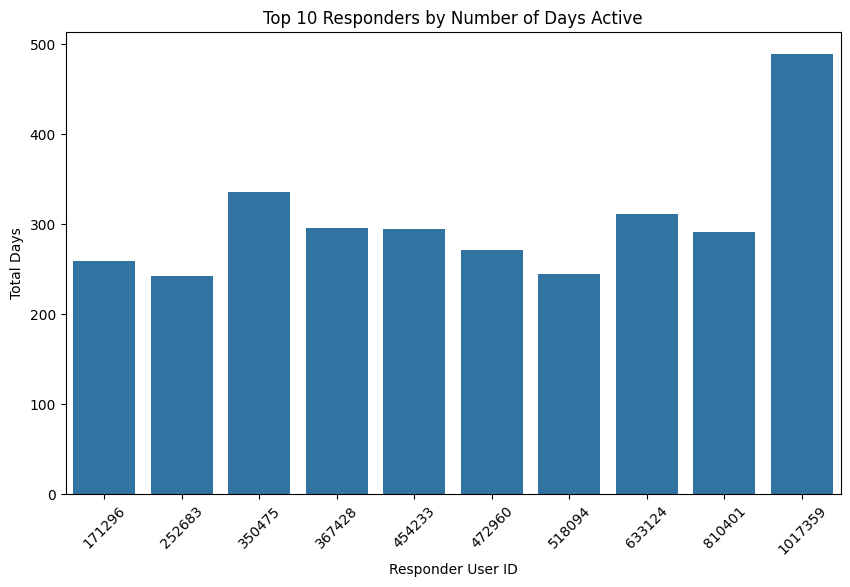

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='response_user_id', y='unique_days_active', data=top_activity.head(10))
plt.title('Top 10 Responders by Number of Days Active')
plt.xlabel('Responder User ID')
plt.ylabel('Total Days')
plt.xticks(rotation=45)
plt.show()

**Identifying leaders based on expertise**

Users whose responses are concentrated around a topic and specialze responding in a particular area. Use Gini index to determine which users tend to respond to a specialized set of topics (gini > 0.75)

In [18]:
def gini(values):
    """
    Compute Gini coefficient for a list/array/Pandas Series of non-negative values.
    """
    x = np.asarray(values, dtype=float).flatten()  # ensure 1D array

    if len(x) == 0:
        return 0.0

    if np.any(x < 0):
        raise ValueError("Values must be non-negative")

    total = x.sum()
    if total == 0:
        return 0.0

    x_sorted = np.sort(x)
    n = len(x_sorted)
    cumulative = np.cumsum(x_sorted)

    g = (n + 1 - 2 * np.sum(cumulative) / total) / n
    return g


In [19]:
# Filter out rows where question_topic is UNKNOWN (missing in original data)
topic_df = df[df['question_topic'] != 'UNKNOWN']
print(df.shape, topic_df.shape)

# Create table of response_user_ids and the number of responses they give by the topic
topic_counts = topic_df.groupby(['response_user_id', 'question_topic']).size().reset_index(name='count')
responder_topic_dist = topic_counts.groupby('response_user_id')['count'].apply(list)
responder_topic_dist.head(20)

(5000000, 30) (4401028, 30)


,count
response_user_id,
7,"[1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]"
10,[1]
18,"[1, 1]"
19,"[1, 1, 1, 1]"
20,"[2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 24, 1,..."
26,"[1, 4, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2]"
29,"[8, 3, 4, 4, 4, 1, 7, 1, 2, 30, 19, 1, 18, 1, ..."
30,"[1, 2, 3, 1, 3, 1]"
32,"[3, 3, 1, 1, 1, 5, 5, 1, 1, 1, 1, 3, 1, 1, 1, ..."


In [20]:
# Calculate the gini index for each responder_id
purity = responder_topic_dist.apply(gini).reset_index()
purity.columns = ['response_user_id', 'topic_purity_score']
purity.head()

,response_user_id,topic_purity_score
0,7,0.16
1,10,0.00
2,18,0.00
3,19,0.00
4,20,0.50


In [21]:
purity.describe()

,response_user_id,topic_purity_score
count,204967.00,204967.00
mean,684187.18,0.20
std,400085.65,0.20
min,7.00,0.00
25%,344095.00,0.00
50%,668398.00,0.17
75%,1024958.00,0.35
max,1496492.00,0.91


In [22]:
# response_user_id list having users responding to a small concentration of topics
specialized_responders = purity[purity['topic_purity_score'] > 0.75]['response_user_id']
print(specialized_responders.shape)

# response_user_id and the topic they specialize in
specialized_responders_df = topic_counts[topic_counts['response_user_id'].isin(specialized_responders)]
idx_max = specialized_responders_df.groupby('response_user_id')['count'].idxmax()
specialized_responders_df = specialized_responders_df.loc[idx_max]

top_specialists = specialized_responders_df.sort_values('count', ascending=False).head(10)
top_specialists

(945,)


,response_user_id,question_topic,count
186138,171296,tomato,2110
790488,910595,maize,1326
212991,202949,maize,1259
479801,478338,maize,1220
359283,360002,cattle,1110
839993,960285,tobacco,902
710951,807113,chicken,883
446914,446386,tomato,877
1053119,1214559,maize,811
244495,245697,maize,798


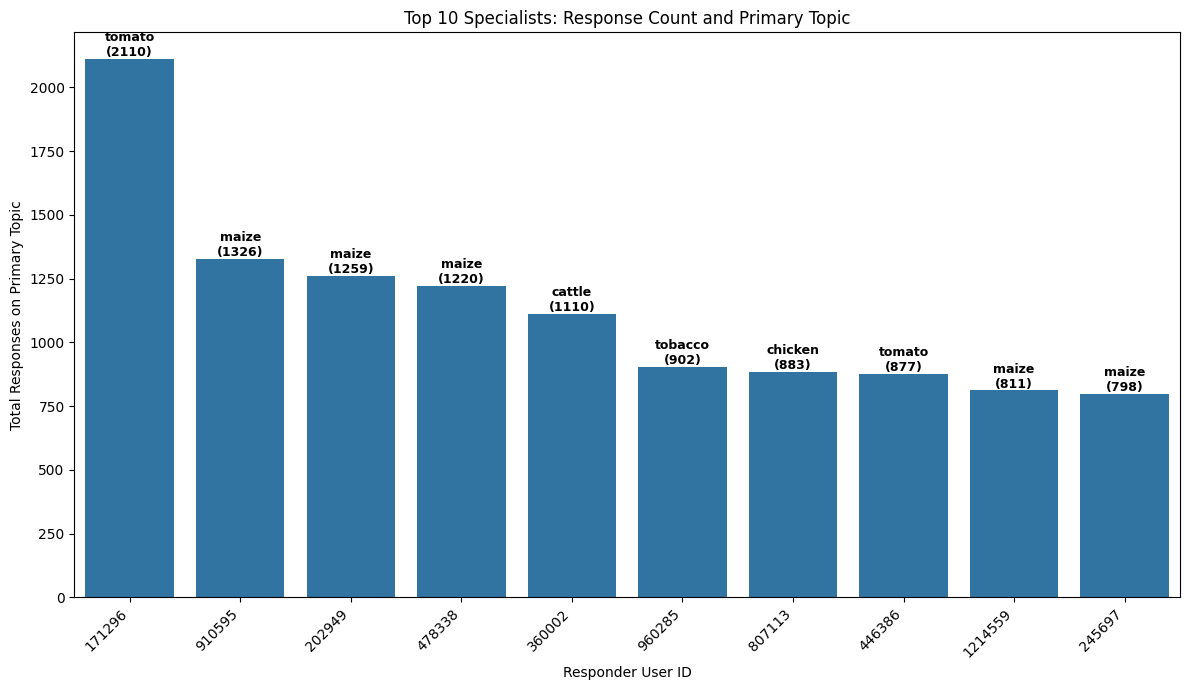

In [23]:
user_order = top_specialists['response_user_id'].tolist()

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='response_user_id',
    y='count',
    data=top_specialists,
    order=user_order
)

ax.set_title('Top 10 Specialists: Response Count and Primary Topic')
ax.set_xlabel('Responder User ID')
ax.set_ylabel('Total Responses on Primary Topic')

for i, p in enumerate(ax.patches):
    topic = top_specialists.iloc[i]['question_topic']
    count = top_specialists.iloc[i]['count']
    annotation_text = f"{topic}\n({count})"
    ax.annotate(
        annotation_text,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Topics with most specialized users
top_topics = specialized_responders_df.groupby('question_topic')['response_user_id'].nunique().sort_values(ascending=False).reset_index().head(10)
top_topics.columns = ['question_topic', 'users']
top_topics

,question_topic,users
0,maize,332
1,tomato,177
2,cattle,173
3,chicken,125
4,poultry,45
5,pig,20
6,coffee,9
7,banana,8
8,onion,7
9,rabbit,7


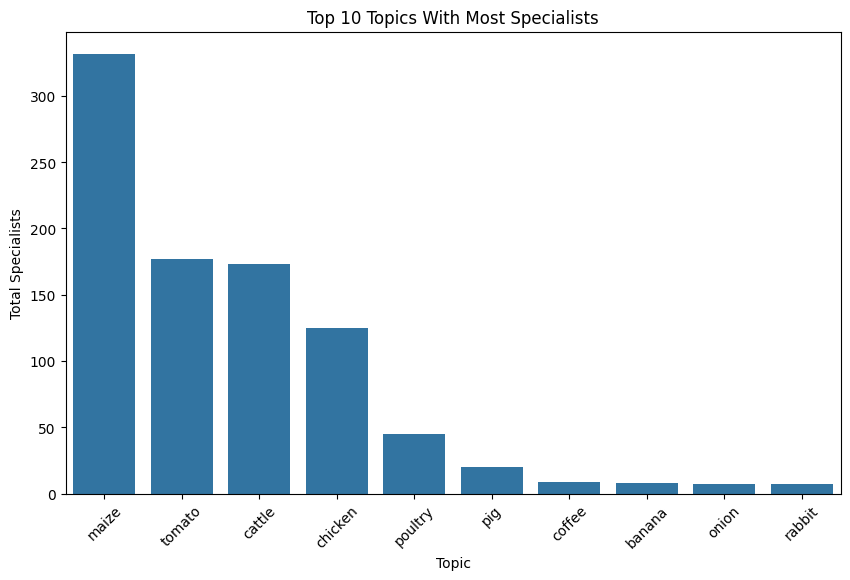

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='question_topic', y='users', data=top_topics)
plt.title('Top 10 Topics With Most Specialists')
plt.xlabel('Topic')
plt.ylabel('Total Specialists')
plt.xticks(rotation=45)
plt.show()

**Identifying leaders based on geographical reach**

Users whose responses cover the most number of countries

In [26]:
most_countries = df.groupby('response_user_id')['question_user_country_code'].nunique().reset_index()
most_countries.rename(columns={'question_user_country_code': 'total_countries'}, inplace=True)
most_countries = most_countries.sort_values(by='total_countries', ascending=False).reset_index(drop=True)
most_countries.head(10)

,response_user_id,total_countries
0,978388,2
1,836780,2
2,570931,2
3,58532,2
4,383661,2
5,359344,2
6,141964,2
7,141946,2
8,1014978,2
9,185797,2


**Identifying leaders based on their reliability**

1. Users with longer tenures and older accounts
2. Users who take lower time to respond on an average to newly posted questions
3. Users who have responded to questions consistently over a period of time

In [27]:
# Find the time of the latest response
latest_response_time = df['response_sent_time'].max()
print(latest_response_time)

# For each user, find the earliest creation date
account_duration_df = df.groupby('response_user_id')['response_user_created_at_time'].min().reset_index()
account_duration_df['tenure'] = (latest_response_time - account_duration_df['response_user_created_at_time']).dt.days

# Users with tenures longer than 5 years
print(account_duration_df[account_duration_df['tenure'] >= 5 * 365]['response_user_id'].shape)

# Top 15 longest tenured users
account_duration_df.sort_values(by='tenure', ascending=False).head(15)

2022-07-07 14:12:45+00:00
(39182,)


,response_user_id,response_user_created_at_time,tenure
10,46,2014-11-28 12:00:39+00:00,2778
0,7,2014-11-27 16:15:53+00:00,2778
3,19,2014-11-28 08:05:24+00:00,2778
2,18,2014-11-28 08:03:54+00:00,2778
5,26,2014-11-28 08:11:00+00:00,2778
1,10,2014-11-28 04:15:40+00:00,2778
9,44,2014-11-28 11:59:59+00:00,2778
8,32,2014-11-28 11:43:54+00:00,2778
7,30,2014-11-28 11:43:39+00:00,2778
6,29,2014-11-28 11:43:25+00:00,2778


In [28]:
# Find recency of response and average of time taken to respond by user.
df['response_hours'] = (df['response_sent_time'] - df['question_sent_time']).dt.total_seconds() / (60 * 60)
latency = df.groupby('response_user_id')['response_hours'].mean().reset_index()

# Find users with at least 3 responses for statistical significance
valid_responders = top_responders[top_responders['total_responses'] >= 5]['response_user_id'].unique()
latency = latency[latency['response_user_id'].isin(valid_responders)]

print(latency['response_hours'].max())
latency = latency.sort_values('response_hours', ascending=True).head(10)
latency

28636.892824074075


,response_user_id,response_hours
135381,836170,0.01
96427,564333,0.01
186080,1122955,0.02
11201,73770,0.02
170849,1029881,0.02
157997,963094,0.02
149340,925780,0.02
9067,60104,0.02
126804,778178,0.03
106891,633369,0.03


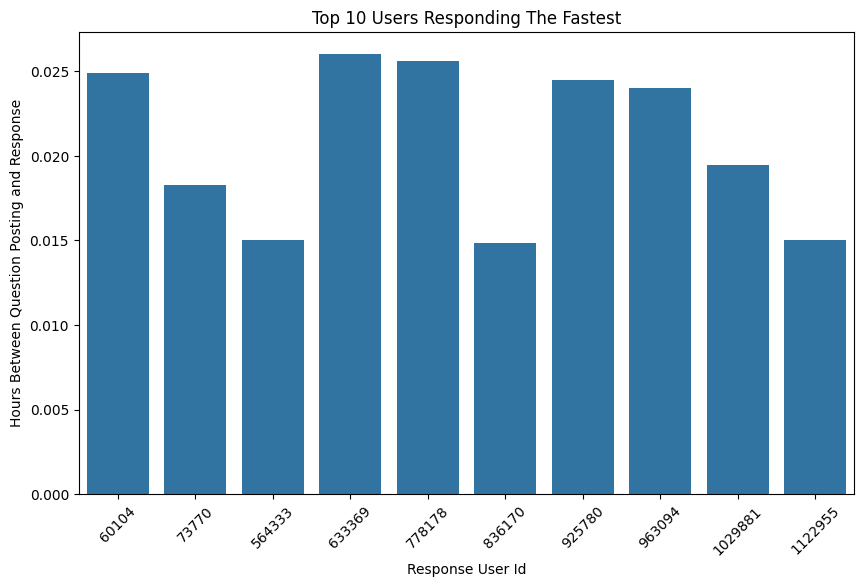

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='response_user_id', y='response_hours', data=latency)
plt.title('Top 10 Users Responding The Fastest')
plt.xlabel('Response User Id')
plt.ylabel('Hours Between Question Posting and Response')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Find users who respond the most consistently across weeks

# Remove duplicate responses per response_user_id and response_id
cov_df = df.groupby(['response_user_id', 'response_id', 'question_id', 'question_sent_time'])['response_sent_time'].min().reset_index()

# Remove users with fewer than 5 responses for statistical significance
cov_df = cov_df[cov_df['response_user_id'].isin(valid_responders)]

# Convert time to a monthly format
cov_df['year_week'] = cov_df['response_sent_time'].dt.strftime("%Y-%U")

print(cov_df.shape)
cov_df.head()

(3602373, 6)


,response_user_id,response_id,question_id,question_sent_time,response_sent_time,year_week
0,7,3998689,3997210,2017-11-30 18:27:42+00:00,2017-11-30 20:06:20+00:00,2017-48
1,7,4065303,4065240,2017-12-06 10:45:02+00:00,2017-12-06 10:53:34+00:00,2017-49
2,7,4103900,4094911,2017-12-08 04:40:48+00:00,2017-12-08 15:27:43+00:00,2017-49
3,7,4136491,4135948,2017-12-12 05:18:10+00:00,2017-12-12 06:39:04+00:00,2017-50
4,7,4595405,4587973,2018-01-25 17:33:52+00:00,2018-01-26 08:11:20+00:00,2018-03


In [31]:
weekly_counts = cov_df.groupby(['response_user_id', 'year_week']).size().reset_index(name='weekly_responses')
weekly_counts.describe()

,response_user_id,weekly_responses
count,1049498.00,1049498.00
mean,575841.29,3.43
std,354538.51,9.87
min,7.00,1.00
25%,284744.00,1.00
50%,522184.00,1.00
75%,871511.00,3.00
max,1493213.00,946.00


In [32]:
active_weeks = cov_df.groupby("response_user_id")["year_week"].nunique().reset_index()
active_weeks.columns = ["response_user_id", "active_weeks"]
active_weeks.head()

,response_user_id,active_weeks
0,7,8
1,20,33
2,26,15
3,29,23
4,30,4


In [33]:
active_weeks.describe()

,response_user_id,active_weeks
count,113931.00,113931.00
mean,677982.76,9.21
std,389043.02,7.49
min,7.00,1.00
25%,349375.00,4.00
50%,680909.00,7.00
75%,1009540.50,11.00
max,1493213.00,134.00


In [34]:
active_weeks[active_weeks['active_weeks'] > 26].shape

(4566, 2)